# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data,labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
print(df.head(3))
print("")
print(df.iloc[:3])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
print(df.iloc[:,[0,1]])

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
print(df.iloc[[2,3,7],[0,1]])

  animal  age
c  snake  0.5
d    dog  NaN
h    cat  NaN


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
numberOfVisits = df['visits'] >= 3
#It says greater than 3 but no records are so - so i printed equals as well
print(df[numberOfVisits])

  animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
ageMissing = df['age'] != df['age']
print(df[ageMissing])

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
cat = df['animal'] == 'cat' 
underThree = df['age'] < 3
print(df[cat&underThree])

  animal  age  visits priority
a    cat  2.5       1      yes
f    cat  2.0       3       no


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
underFour = df['age'] <= 4
overTwo = df['age'] >= 2
print(df[underFour&overTwo])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


```Change the age in row 'f' to 1.5.```

In [0]:
df.set_value('f', 'age', 1.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
print(df['visits'].sum())
print("")
print(np.sum(df['visits']))

19

19


```Calculate the mean age for each different animal in `df`.```

In [0]:
dog = df['animal'] == 'dog'
cat = df['animal'] == 'cat'
snake = df['animal'] == 'snake'
isNotNan = ['age'] == ['age']
print('The dog\'s mean age is', df[dog & isNotNan]['age'].mean())
print('The cat\'s mean age is', df[cat & isNotNan]['age'].mean())
print('The snake\'s mean age is', df[snake & isNotNan]['age'].mean())

The dog's mean age is 5.0
The cat's mean age is 2.3333333333333335
The snake's mean age is 2.5


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
newRow = {'animal' : ['cat'],
          'age' : [3],
          'visits' : [12],
          'priority': ['yes']}
newLabel = ['k']
k = pd.DataFrame(newRow,newLabel)
df = df.append(k)
print(df ,'.\n')
df = df.iloc[:-1,:]
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k    cat  3.0      12      yes .

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Count the number of each type of animal in `df`.```

In [0]:
dog = df['animal'] == 'dog'
cat = df['animal'] == 'cat'
snake = df['animal'] == 'snake'
print('Amount of cats: ', len(df[cat]))
print('Amount of dogs: ', len(df[dog]))
print('Amount of snakes: ', len(df[snake]))

Amount of cats:  4
Amount of dogs:  4
Amount of snakes:  2


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
df = df.sort_values(by = ['age', 'visits'], ascending = [False, True])
print(df)

  animal  age  visits priority
i    dog  7.0       2       no
e    dog  5.0       2       no
g  snake  4.5       1       no
j    dog  3.0       1       no
b    cat  3.0       3      yes
a    cat  2.5       1      yes
f    cat  1.5       3       no
c  snake  0.5       2       no
h    cat  NaN       1      yes
d    dog  NaN       3      yes


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
yes = df['priority'] == 'yes'
no = df['priority'] == 'no'
df.set_value(yes, 'priority', True)
df.set_value(no, 'priority', False)
print(df)

  animal  age  visits  priority
i    dog  7.0       2     False
e    dog  5.0       2     False
g  snake  4.5       1     False
j    dog  3.0       1     False
b    cat  3.0       3      True
a    cat  2.5       1      True
f    cat  1.5       3     False
c  snake  0.5       2     False
h    cat  NaN       1      True
d    dog  NaN       3      True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
snake = df['animal'] == 'snake'
df.set_value(snake, 'animal', 'python')
print(df)

   animal  age  visits  priority
i     dog  7.0       2     False
e     dog  5.0       2     False
g  python  4.5       1     False
j     dog  3.0       1     False
b     cat  3.0       3      True
a     cat  2.5       1      True
f     cat  1.5       3     False
c  python  0.5       2     False
h     cat  NaN       1      True
d     dog  NaN       3      True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
print(pd.pivot_table(df, values = 'age', index = ['animal', 'visits'], aggfunc = np.mean))

                age
animal visits      
cat    1       2.50
       3       2.25
dog    1       3.00
       2       6.00
python 1       4.50
       2       0.50


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
ages = [int(np.random.uniform(20,66)) for i in range(1000)]
skills = [float(np.random.normal(0.5, 0.3)) for i in range(1000)]
heights = [int(np.random.randint(150,200)) / 100 for i in range(1000)]
myData = {'age' : ages, 'skill' : skills, 'height' : heights}
dataIndex = [i for i in range(1000)]
df = pd.DataFrame(myData, dataIndex)

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
salaries = 1000 * ((df['age']**2/1000) + 1.7 * df['skill'] + 0.4 * np.exp(-(df['height'] - 1.7)**2))
salaryFrame = pd.DataFrame({'salary' : salaries} ,[i for i in range(1000)])
df['salary'] = salaryFrame
print(df)

     age     skill  height       salary
0     54  0.456963    1.92  4073.938604
1     49  0.586618    1.84  3790.486922
2     39  0.605126    1.80  2945.733734
3     34  0.883921    1.66  3058.026307
4     56  0.515054    1.80  4407.611332
5     41  0.422244    1.78  2796.262310
6     50  0.349575    1.50  3478.594027
7     45  0.338608    1.86  2990.523207
8     27  0.499601    1.86  1968.210978
9     32  0.604879    1.65  2451.295623
10    23  0.373174    1.87  1552.000839
11    61  0.330943    1.98  4653.441231
12    45  0.101804    1.58  2592.347838
13    37 -0.012281    1.64  1746.685734
14    43  0.972066    1.66  3900.872813
15    28 -0.037753    1.63  1117.864090
16    39  0.371910    1.85  2544.347992
17    37  0.288708    1.98  2229.642173
18    64  0.289435    1.83  4981.335893
19    64  0.699604    1.91  5668.069477
20    30  0.742755    1.64  2561.246630
21    41  0.630610    1.92  3134.138434
22    64  0.639334    1.80  5578.887798
23    32  0.234413    1.62  1819.949550


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
def leftDigit (Index):
    age = int(df.loc[int(Index)]["age"])
    while (age >= 10):
        age = int(age/10)
    return int(age)
dfLeftDigit = df.groupby(leftDigit).agg({'age':'count','salary': np.mean,'height':'max'})
dfLeftDigit = dfLeftDigit.rename(index = str, columns = {'age': 'amount'})
dfLeftDigit = dfLeftDigit.rename(index = str, columns = {'height' : 'maxHeight'})
dfLeftDigit = dfLeftDigit.rename(index = str, columns = {'salary' : 'meanSalary'})
print(dfLeftDigit)
dfAge = df.groupby('age').agg({'skill':'count','salary': np.mean,'height':'max'})
dfAge = dfAge.rename(index = str, columns = {'skill': 'amount'})
dfAge = dfAge.rename(index = str, columns = {'height' : 'maxHeight'})
dfAge = dfAge.rename(index = str, columns = {'salary' : 'meanSalary'})
print(dfAge)

   amount   meanSalary  maxHeight
2     202  1892.871479       1.99
3     223  2455.214487       1.99
4     221  3179.795409       1.99
5     210  4252.914544       1.99
6     144  5228.115129       1.99
     amount   meanSalary  maxHeight
age                                
20       21  1719.108676       1.97
21       18  1803.629936       1.98
22       18  1933.973554       1.94
23       22  1712.731054       1.98
24       23  1857.241954       1.99
25       19  1854.005674       1.97
26       22  1979.496192       1.98
27       21  1962.768194       1.98
28       23  2114.230884       1.99
29       15  1997.651941       1.98
30       24  1926.822665       1.97
31       24  2206.694376       1.96
32       18  2375.840181       1.99
33       17  2383.026811       1.99
34       22  2334.431646       1.97
35       28  2518.406603       1.99
36       16  2526.593315       1.97
37       22  2570.037653       1.98
38       29  2627.170063       1.98
39       23  3043.682964       1.98
40  

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
dfAgeNew = df.groupby('age').agg({'salary': np.mean,'height':'sum'})
dfAgeComputed = dfAgeNew['salary']/ dfAgeNew['height']
dfAgeComputed = pd.DataFrame(dfAgeComputed)
dfAgeComputed = dfAgeComputed.rename(columns={0:'mean salary, divided by the sum of heights'})


print(dfAgeComputed)

     mean salary, divided by the sum of heights
age                                            
20                                    46.944530
21                                    59.584735
22                                    60.912553
23                                    43.759097
24                                    45.869152
25                                    58.357119
26                                    51.322172
27                                    53.833467
28                                    52.371337
29                                    72.721221
30                                    45.724316
31                                    53.083819
32                                    74.314676
33                                    80.671185
34                                    59.234500
35                                    52.227429
36                                    89.627290
37                                    68.008406
38                                    51

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

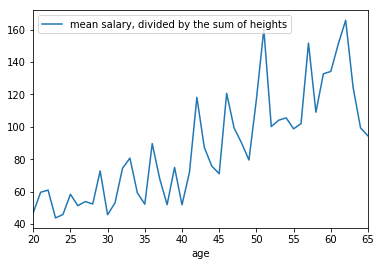

In [0]:
dfAgeComputed.plot()

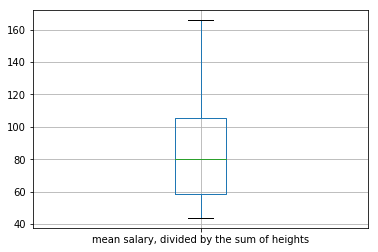

In [0]:
dfAgeComputed.boxplot()

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')
pd.options.display.max_columns=50

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

The oldest house:  1872
The highest price  755000
The mean area  10516.828082191782
The 50 - percentile of the area is  9478.5
Is having a fireplace more common then not having one?  True
The mean price of houses that have swimming pools:  288138.5714285714
                SalePrice  YearBuilt  FullBath
Fireplaces                                    
0           141331.482609  54.781159       964
1           211843.909231  39.150769      1124
2           240588.539130  54.347826       188
3           252000.000000  38.400000         9


OverallQual                  
             mean max min       std
False    5.556180  10   3  1.193055
True     6.389908   9   4  1.111021

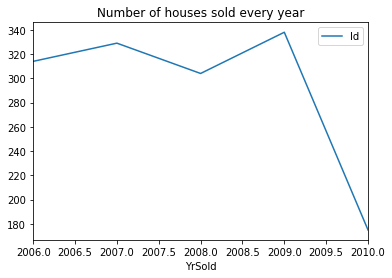

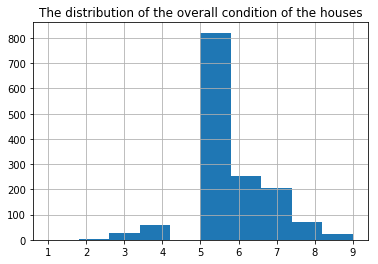

In [4]:
print('The oldest house: ', df['YearBuilt'].min())
print('The highest price ', df['SalePrice'].max())
print('The mean area ', df['LotArea'].mean())
print('The 50 - percentile of the area is ', df['LotArea'].describe()['50%'])
print('Is having a fireplace more common then not having one? ', (df['Fireplaces'] >= 1).count() >  df['Fireplaces'].count() / 2)
print('The mean price of houses that have swimming pools: ', (df[df.PoolArea > 0]['SalePrice'].mean()))
df.groupby('YrSold').agg({'Id': 'count'}).plot()
plt.title('Number of houses sold every year')
df.hist('OverallCond')
plt.title('The distribution of the overall condition of the houses')
newDf = df.groupby('Fireplaces').agg({'SalePrice' : np.mean, 'YearBuilt' : np.mean, 'FullBath' : sum})
newDf ['YearBuilt'] = 2019 - newDf['YearBuilt']
print(newDf)
def dividedBy20 (Index):
    return df.loc[int(Index)]["MSSubClass"] % 20 == 0
df[df.MSSubClass > 60].groupby(dividedBy20).agg({'OverallQual' :[ 'mean',  'max',  'min',  'std']})

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
Indexes = [i for i in range(len(df))]
lotAreaMeters = df['LotArea'] * 0.09290304
twoFloors = df['1stFlrSF'] + df['2ndFlrSF']
garageSquare = df['GarageArea'] ** 0.5
areaForBed = lotAreaMeters / (df['BedroomAbvGr'] + 1)
lotForYear = [0 for i in range(len(df))]
byYears = df.groupby('YearBuilt').agg({'LotArea' : 'mean'})
houseRanking = df.sort_values(by = ['LotArea'], ascending = [False])
rank = [0 for i in range(len(df))]
for i in range(len(df) - 1):
    rank[houseRanking.loc[i]['Id']] = i
    year = df.iloc[i]['YearBuilt']
    lotForYear[i] = lotAreaMeters.iloc[i]/(1e-5 + byYears.loc[year]['LotArea'])
hotEncoding=pd.get_dummies(df['LotConfig'])
Data = {'LotArea' : lotAreaMeters, 'FlrSF' : twoFloors, 'Garage' : garageSquare, 'AreaForBed' : areaForBed, 'LotValueForYear' : 
       lotForYear, 'LotAreaRank' : rank}
myDf = pd.DataFrame(Data)
myDf = myDf.join(hotEncoding)
names = ['LotArea', 'FlrSF', 'Garage', 'AreaForBed', 'LotValueForYear', 'LotAreaRank','Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
salePrices = df['SalePrice']
#Normalize target
maxPrice = df['SalePrice'].max()
salePrices = salePrices / maxPrice
#Normalize Data
trainData, testData, trainPrices, testPrices = train_test_split(myDf, salePrices, test_size = 0.3, random_state = 42)
scaler = StandardScaler()
scaler.fit(trainData)
trainData = scaler.transform(trainData)
scaler = StandardScaler()
scaler.fit(testData)
testData = scaler.transform(testData)
linReg = LinearRegression(normalize = True).fit(trainData, trainPrices)


print(linReg.score(testData, testPrices))
print(mean_squared_error(trainPrices,linReg.predict(trainData)))
print(mean_squared_error(testPrices,linReg.predict(testData)))

0.6453603827532766
0.0043525311208675805
0.0043414034480790545


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
Indexes = [i for i in range(len(df))]
lotAreaMeters = df['LotArea'] * 0.09290304
lotAreaMeters2 = lotAreaMeters**2
lotAreaMeters3 = lotAreaMeters**3
twoFloors = df['1stFlrSF'] + df['2ndFlrSF']
twoFloors2 = twoFloors**2
twoFloors3 = twoFloors**3
garageSquare = df['GarageArea'] ** 0.5
garageSquare2 = garageSquare**2
garageSquare3 = garageSquare**3
areaForBed = lotAreaMeters / (df['BedroomAbvGr'] + 1)
areaForBed2 = areaForBed**2
areaForBed3 = areaForBed**3
lotForYear = [0 for i in range(len(df))]
byYears = df.groupby('YearBuilt').agg({'LotArea' : 'mean'})
houseRanking = df.sort_values(by = ['LotArea'], ascending = [False])
rank = [0 for i in range(len(df))]
rank2 = [0 for i in range(len(df))]
rank3 = [0 for i in range(len(df))]
lotForYear2 = [0 for i in range(len(df))]
lotForYear3 = [0 for i in range(len(df))]
for i in range(len(df) - 1):
    rank[houseRanking.loc[i]['Id']] = i
    year = df.iloc[i]['YearBuilt']
    lotForYear[i] = lotAreaMeters.iloc[i]/(1e-5 + byYears.loc[year]['LotArea'])
    lotForYear2[i] = lotForYear[i]**2
    lotForYear3[i] = lotForYear[i]**3
    rank2[i] = rank[i]**2
    rank3[i] = rank[i]**3
hotEncoding=pd.get_dummies(df['LotConfig']) #no need to addd dummies^2 and ^3 as 1^3 = 1, 0^3 = 0 and it wont give extra info
Data = {'LotArea' : lotAreaMeters, 'FlrSF' : twoFloors, 'Garage' : garageSquare, 'AreaForBed' : areaForBed, 'LotValueForYear' : 
       lotForYear, 'LotAreaRank' : rank, 'LotArea2' : lotAreaMeters2, 'FlrSF2' : twoFloors2, 'Garage2' : garageSquare2, 'AreaForBed2' : areaForBed2, 'LotValueForYear2' : 
       lotForYear2, 'LotAreaRank2' : rank2, 'LotArea3' : lotAreaMeters3, 'FlrSF3' : twoFloors3, 'Garage3' : garageSquare3, 'AreaForBed3' : areaForBed3, 'LotValueForYear3' : 
       lotForYear3, 'LotAreaRank3' : rank3}
myDf = pd.DataFrame(Data)
myDf = myDf.join(hotEncoding)
names = ['LotArea', 'FlrSF', 'Garage', 'AreaForBed', 'LotValueForYear', 'LotAreaRank','Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'] #didnt feel the need to add the other powers
#didnt use that list anyway so it felt useless

KeyError: ignored

In [0]:
salePrices = df['SalePrice']
#Normalize target
maxPrice = df['SalePrice'].max()
salePrices = salePrices / maxPrice
#Normalize Data
trainData, testData, trainPrices, testPrices = train_test_split(myDf, salePrices, test_size = 0.3, random_state = 42)
scaler = StandardScaler()
scaler.fit(trainData)
trainData = scaler.transform(trainData)
scaler = StandardScaler()
scaler.fit(testData)
testData = scaler.transform(testData)
linReg = LinearRegression(normalize = True).fit(trainData, trainPrices)
amountOfAlphas = 1000
alphas = [i for i in range(1,amountOfAlphas + 1)]
trainScores = [0 for i in range(1,amountOfAlphas + 1)]
testScores = [0 for i in range(1,amountOfAlphas + 1)]

for a in range(1,amountOfAlphas + 1):
    ridge = Ridge(alpha = a)
    ridge.fit(trainData, trainPrices)
    trainScores[a-1] = mean_squared_error(trainPrices, ridge.predict(trainData))
    testScores[a-1] = mean_squared_error(testPrices, ridge.predict(testData))

In [0]:
plt.plot(alphas, trainScores)
plt.title('The train loss function as a function of alpha')
plt.show()
plt.plot(alphas, testScores)
plt.title('The test loss function as a function of alpha')
plt.show()
# It seemed like the alphas were in an irrelevant range, so i changed it to see more interesting things for example
# the way the test loss gets a minimum at around alpha = 180. therefore'\, it would be best to take that value to 
# minimize our loss function